## Import Libraries

In [ ]:
# TASKS: CONFUSION MATRIX, HOW MANY TIMES A SONG WILL PREDCIT 'ROCK' over 'POP'

In [304]:
import pandas as pd
import re
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.corpus import reuter
from sklearn.pipeline import Pipeline

ImportError: cannot import name 'reuter'

In [4]:
df = pd.read_csv('~/mod_6/lyrics.csv', index_col='index')

In [ ]:
#let's look at genre value counts
df.genre.value_counts()

In [6]:
#filter DF to four genres
genre_list = ['Rock', 'Pop', 'Country', 'Hip-Hop']
df1 = df.loc[(df['genre'] == 'Rock') | (df['genre'] == 'Pop') | (df['genre'] == 'Country') | (df['genre'] == 'Hip-Hop')]

In [8]:
df1.isna().sum() #Checking null values

In [9]:
#drop missing values from df
df1.dropna(inplace=True)

/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Cleaning DataFrame

In [14]:
df1['lyrics'] = df1['lyrics'].str.replace("[\(\[].*?[\)\]]", "", regex=True) #replace items in brackets, and brackets themselves

/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
df1['lyrics'] = df1['lyrics'].str.findall(pattern) #find alphanumeric characters
df1['lyrics'] = df1['lyrics'].str.join(' ') #join all elements back into a string
df1['lyrics'] = df1['lyrics'].str.lower()

/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is tryin

In [221]:
#create a function that clean and tokenizes lyrics
def clean_tokenize_lyrics(song):
    stopwords_list = stopwords.words('english') + list(string.punctuation)
    stopwords_list += ["''", '""', '...', '``']
    word_list = []
    tokenized_lyrics = word_tokenize(song)
     #remove all tokens that are not alphabetic and stopwords
    words = [word for word in tokenized_lyrics if word not in stopwords_list and word.isalpha()]
    for word in words:
        word_list.append(word)
    return word_list

In [222]:
#clean lyrics for all songs
df1['tokenize_stop_lyr'] = df1.lyrics.apply(lambda x: clean_tokenize_lyrics(x))


/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [226]:
df1

,song,year,artist,genre,lyrics,tokenize_lyr,stemmed_lyr,tokenize_stop_lyr
index,,,,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"[oh, baby, know, gon, na, cut, right, chase, w...","[oh, babi, know, gon, na, cut, right, chase, w...","[oh, baby, know, gon, na, cut, right, chase, w..."
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"[playin, everything, easy, like, seem, sure, s...","[playin, everyth, easi, like, seem, sure, stil...","[playin, everything, easy, like, seem, sure, s..."
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"[search, tenderness, hard, find, love, need, l...","[search, tender, hard, find, love, need, live,...","[search, tenderness, hard, find, love, need, l..."
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...","[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...","[oh, oh, oh, oh, oh, oh, wrote, book, stand, t..."
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"[party, people, people, party, popping, sittin...","[parti, peopl, peopl, parti, pop, sit, around,...","[party, people, people, party, popping, sittin..."
...,...,...,...,...,...,...,...,...
362232,who-am-i-drinking-tonight,2012,edens-edge,Country,i gotta say boy after only just a couple of da...,"[got, ta, say, boy, couple, dates, hands, outr...","[got, ta, say, boy, coupl, date, hand, outrigh...","[got, ta, say, boy, couple, dates, hands, outr..."
362233,liar,2012,edens-edge,Country,i helped you find her diamond ring you made me...,"[helped, find, diamond, ring, made, try, every...","[help, find, diamond, ring, made, tri, everyth...","[helped, find, diamond, ring, made, try, every..."
362234,last-supper,2012,edens-edge,Country,look at the couple in the corner booth looks a...,"[look, couple, corner, booth, looks, lot, like...","[look, coupl, corner, booth, look, lot, like, ...","[look, couple, corner, booth, looks, lot, like..."


### Lemmatize lyrics

In [227]:
from nltk.stem import WordNetLemmatizer 
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

In [228]:
df1['lematized_lyrics'] = df1.tokenize_stop_lyr.apply(lemmatize_text)

/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Word count of every genre

In [267]:
rock_len = df1[df1['genre'] == 'Rock'].lyrics.iloc[:].str.split().str.len().sum()
pop_len = int(df1[df1['genre'] == 'Pop'].lyrics.iloc[:].str.split().str.len().sum())
hip_hop_len = int(df1[df1['genre'] == 'Hip-Hop'].lyrics.iloc[:].str.split().str.len().sum())
country_len = int(df1[df1['genre'] == 'Country'].lyrics.iloc[:].str.split().str.len().sum())

Word count of genres WITH STOPWORDS + LEMATIZE

In [297]:
rock_stop_len = df1[df1['genre'] == 'Rock'].lematized_lyrics.iloc[:].str.join(' ').str.split().str.len().sum()
pop_stop_len = df1[df1['genre'] == 'Pop'].lematized_lyrics.iloc[:].str.join(' ').str.split().str.len().sum()
hiphop_stop_len = df1[df1['genre'] == 'Hip-Hop'].lematized_lyrics.iloc[:].str.join(' ').str.split().str.len().sum()
country_stop_len = df1[df1['genre'] == 'Country'].lematized_lyrics.iloc[:].str.join(' ').str.split().str.len().sum()

In [276]:
rock_words_removed = rock_stop_len / rock_len
pop_words_removed = pop_stop_len / pop_len
hiphop_words_removed = hiphop_stop_len / hip_hop_len
country_words_removed = country_stop_len / country_len

In [280]:
print(rock_words_removed)
print(pop_words_removed)
print(hiphop_words_removed)
print(country_words_removed)

0.5087385088838009
0.5336079920544421
0.5577892217880954
0.4888386142419817


As shown above, hip_hop had the most stopwords removed

In [268]:
df1

,song,year,artist,genre,lyrics,tokenize_stop_lyr,lematized_lyrics
index,,,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"[oh, baby, know, gon, na, cut, right, chase, w...","[oh, baby, know, gon, na, cut, right, chase, w..."
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"[playin, everything, easy, like, seem, sure, s...","[playin, everything, easy, like, seem, sure, s..."
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"[search, tenderness, hard, find, love, need, l...","[search, tenderness, hard, find, love, need, l..."
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...","[oh, oh, oh, oh, oh, oh, wrote, book, stand, t..."
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"[party, people, people, party, popping, sittin...","[party, people, people, party, popping, sittin..."
...,...,...,...,...,...,...,...
362232,who-am-i-drinking-tonight,2012,edens-edge,Country,i gotta say boy after only just a couple of da...,"[got, ta, say, boy, couple, dates, hands, outr...","[got, ta, say, boy, couple, date, hand, outrig..."
362233,liar,2012,edens-edge,Country,i helped you find her diamond ring you made me...,"[helped, find, diamond, ring, made, try, every...","[helped, find, diamond, ring, made, try, every..."
362234,last-supper,2012,edens-edge,Country,look at the couple in the corner booth looks a...,"[look, couple, corner, booth, looks, lot, like...","[look, couple, corner, booth, look, lot, like,..."


In [240]:
df1.genre.value_counts()

Rock       109235
Pop         40466
Hip-Hop     24850
Country     14387
Name: genre, dtype: int64

### Save Clean Dataframe as csv file

In [54]:
# df1.to_csv('clean_lyric_df.csv')
# df1 = pd.read_csv('clean_lyric_df.csv')

## NLP Preprocessing

### Vectorize Words

In [57]:
#create function to vectorize lyrics
def count_vectorize(song, vocab=None):
    if vocab:
        unique_words = vocab
    else:
        unique_words = list(set(song))
    
    song_dict = {i:0 for i in unique_words}
    
    for word in song:
        song_dict[word] += 1
    
    return song_dict

In [64]:
# BoW = df1.tokenize_lyr.apply(lambda x: count_vectorize(x))

In [68]:
import itertools
lyr_list = df1.tokenize_stop_lyr.to_list()
lyr_list = list(itertools.chain.from_iterable(lyr_list))

In [80]:
len(lyr_list) # all words in lyrics

23560911

### Term Frequency

In [75]:
#create term frequency function
def term_frequency(BoW_dict):
    total_word_count = sum(BoW_dict.values())
    
    for ind, val in BoW_dict.items():
        BoW_dict[ind] = val/ total_word_count
    
    return BoW_dict

In [77]:
#create a list of dictionaries
def create_list_of_BoW(song_lyrics):

    list_of_dictionaries = []

    for song in song_lyrics:
        BoW = count_vectorize(song)

        list_of_dictionaries.append(BoW)
    return list_of_dictionaries

list_of_dictionaries = create_list_of_BoW(df1['tokenize_stop_lyr']) #BoW for all songs

### Inverse Document Frequency

In [81]:
def inverse_document_frequency(list_of_dicts):
    vocab_set = set()
    # Iterate through list of dfs and add index to vocab_set
    for d in list_of_dicts:
        for word in d.keys():
            vocab_set.add(word)
    
    # Once vocab set is complete, create an empty dictionary with a key for each word and value of 0.
    full_vocab_dict = {i:0 for i in vocab_set}
    
    # Loop through each word in full_vocab_dict
    for word, val in full_vocab_dict.items():
        docs = 0
        
        # Loop through list of dicts.  Each time a dictionary contains the word, increment docs by 1
        for d in list_of_dicts:
            if word in d:
                docs += 1
        
        # Now that we know denominator for equation, compute and set IDF value for word
        
        full_vocab_dict[word] = np.log((len(list_of_dicts)/ float(docs)))
    
    return full_vocab_dict

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# idf = inverse_document_frequency(list_of_dictionaries)

### Top Words

In [298]:
import itertools
rock_lyr = df1[df1['genre']=='Rock'].lematized_lyrics.to_list()
rock_lyr = list(itertools.chain.from_iterable(rock_lyr))

pop_lyr = df1[df1['genre']=='Pop'].lematized_lyrics.to_list()
pop_lyr = list(itertools.chain.from_iterable(pop_lyr))

rap_lyr = df1[df1['genre']=='Hip-Hop'].lematized_lyrics.to_list()
rap_lyr = list(itertools.chain.from_iterable(rap_lyr))

country_lyr = df1[df1['genre']=='Country'].lematized_lyrics.to_list()
country_lyr = list(itertools.chain.from_iterable(country_lyr))

In [299]:
from nltk import word_tokenize, FreqDist
#Exploring most frequent words
lyr_dist = FreqDist(lyr_list)
lyr_dist.most_common(10)

[('like', 251243),
 ('know', 241414),
 ('love', 234615),
 ('got', 224171),
 ('get', 177347),
 ('na', 171952),
 ('oh', 165765),
 ('go', 142294),
 ('one', 141890),
 ('time', 138400)]

In [ ]:
#FUNCTION TO PLOT TOP 25 WORDS
from wordcloud import WordCloud
def word_cloud(words):
    wc = WordCloud(max_words=25, max_font_size=50).generate(words)
    plt.figure(figsize=(20,20))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Top 25 Rock Words

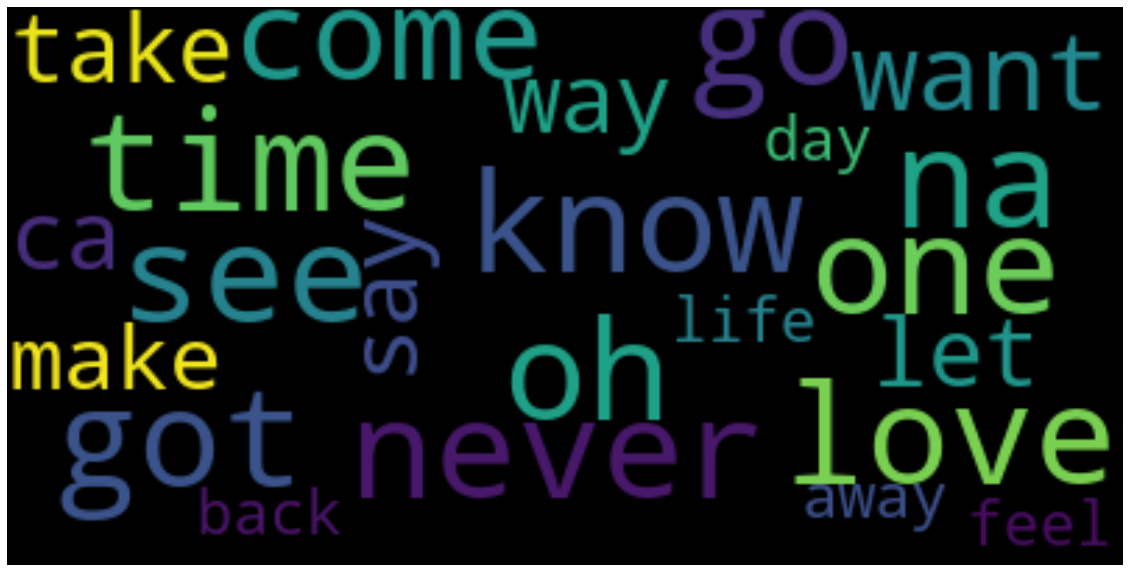

In [365]:
rock_dist = FreqDist(rock_lyr)
rock_words = ' '.join([i[0] for i in rock_dist.most_common(25)])
word_cloud(rock_words)

Top 25 Pop Words

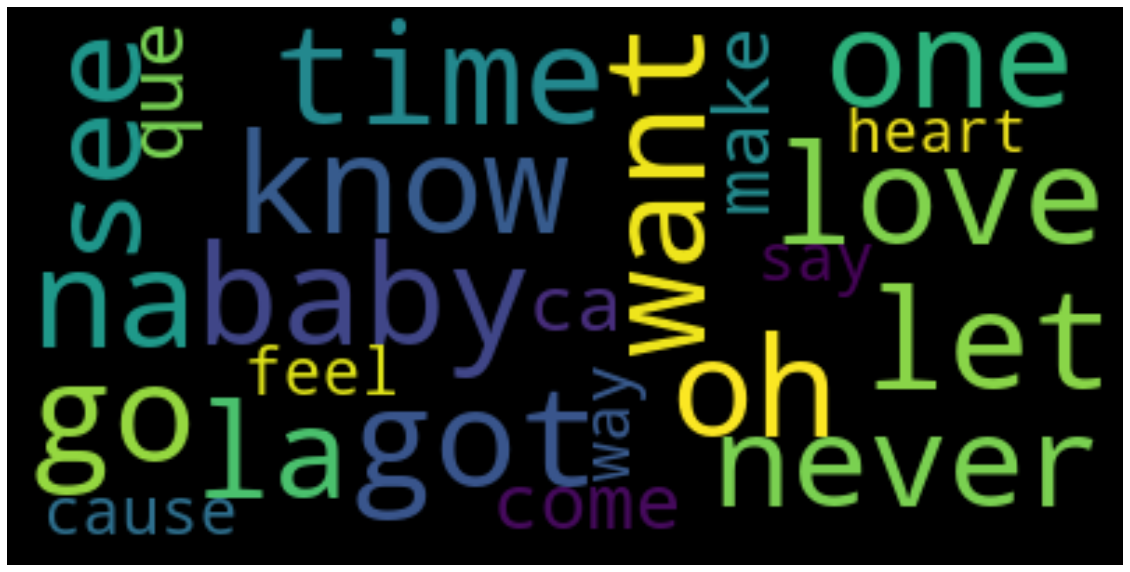

In [366]:
pop_dist = FreqDist(pop_lyr)
pop_words = ' '.join([i[0] for i in pop_dist.most_common(25)])
word_cloud(pop_words)

Top 25 Rap Words

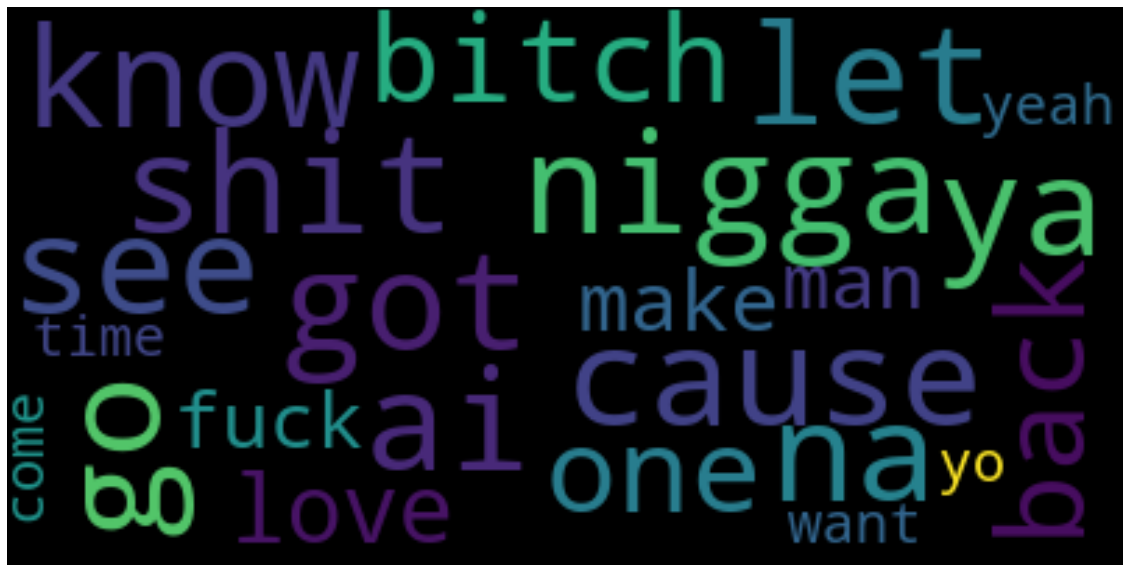

In [367]:
rap_dist = FreqDist(rap_lyr)
rap_words = ' '.join([i[0] for i in rap_dist.most_common(25)])
word_cloud(rap_words)

Top 25 Country Words

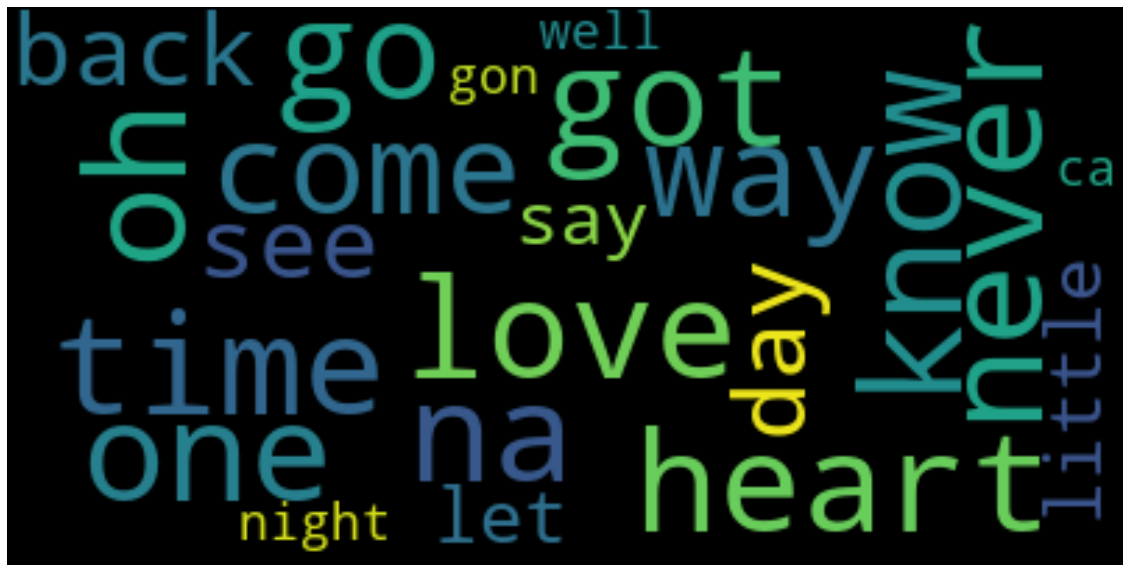

In [368]:
country_dist = FreqDist(country_lyr)
country_words = ' '.join([i[0] for i in country_dist.most_common(25)])
word_cloud(country_words)

## Modeling

Fit/Transform training and test lyrics to vectors

In [209]:
#Perform TTS for text data without stopwords
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1['lyrics'],df1['genre'], test_size = 0.2)

In [345]:
#with stopwords + lemmatized
x1_train, x1_test, y1_train, y1_test = train_test_split(df1['lematized_lyrics'].str.join(' '),df1['genre'], test_size = 0.2)

In [346]:
#Vectorize all words in lyrics
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tf_idf_data_train = vectorizer.fit_transform(x_train)
tf_idf_data_test = vectorizer.transform(x_test)

tf_idf_data_train_lem = vectorizer.fit_transform(x1_train)
tf_idf_data_test_lem = vectorizer.transform(x1_test)

In [347]:
#Vectorize all words in tokenized lyrics
tf_idf_data_train_lem = vectorizer.fit_transform(x1_train)
tf_idf_data_test_lem = vectorizer.transform(x1_test)

In [135]:
non_zero_cols = tf_idf_data_train.nnz / float(tf_idf_data_train.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

Average Number of Non-Zero Elements in Vectorized Articles: 98.18943433675157


In [136]:
percent_sparse = 1 - (non_zero_cols / float(tf_idf_data_train.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

Percentage of columns containing 0: 0.9996412280152266


### SVM

In [310]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [320]:
y_pred2 = sgd.predict(x_test)
accuracy_score(y_pred2, y_test)
f1_score(y_pred2, y_test, average='weighted')

/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.7558254034792001

### Logistic Regression

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=-1, C=1e5)),
               ])
logreg.fit(x_train, y_train)

/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Con

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

Lemmmatized lyrics

In [348]:
logreg.fit(x1_train, y1_train)

/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Con

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [349]:
lem_pred = logreg.predict(x1_test)
print(accuracy_score(lem_pred, y1_test))
print(f1_score(lem_pred, y1_test, average='weighted'))

0.69117180057161
0.7016674471050973


Raw lyrics

In [308]:
y_pred3 = logreg.predict(x_test)
accuracy_score(y_pred3, y_test)
f1_score(y_pred3, y_test, average='weighted')

0.7043324332574048

### NB classifier

In [313]:
nb_classifier = MultinomialNB()

In [315]:
#NAIVE BAYES ON TRAIN DATA
nb_classifier.fit(tf_idf_data_train, y_train)
nb_train_preds = nb_classifier.predict(tf_idf_data_train)
nb_test_preds = nb_classifier.predict(tf_idf_data_test)

In [202]:
#NAIVE BAYES ON TOKENIZED TRAIN DATA
nb_classifier.fit(tf_idf_data_train_1, y_train)
nb_train_preds_1 = nb_classifier.predict(tf_idf_data_train_1)
nb_test_preds_1 = nb_classifier.predict(tf_idf_data_test_1)

In [ ]:
#NAIVE BAYES ON TRAIN DATA - ACCURACY AND F1 SCORE
nb_train_accuracy = accuracy_score(y_train, nb_train_preds)
nb_test_accuracy= accuracy_score(y_test, nb_test_preds)

nb_train_f1 = f1_score(y_train, nb_train_preds, average='weighted')
nb_test_f1 = f1_score(y_test, nb_test_preds, average='weighted')


In [318]:
print(nb_test_accuracy)
print(nb_test_f1)

0.5783582089552238
0.4280935797566655


In [203]:
#NAIVE BAYES ON TOKENIZED TRAIN DATA - ACCURACY AND F1 SCORE
nb_train_accuracy_1 = accuracy_score(y_train, nb_train_preds_1)
nb_test_accuracy_1 = accuracy_score(y_test, nb_test_preds_1)

nb_train_f1_1 = f1_score(y_train, nb_train_preds_1, average='weighted')
nb_test_f1_1 = f1_score(y_test, nb_test_preds_1, average='weighted')

In [204]:
print(f'nb_train accuracy: {nb_train_accuracy_1}, nb_train f1_score: {nb_test_accuracy_1}')
print((f'nb_test accuracy: {nb_train_f1_1}, nb_test f1_score: {nb_test_f1_1}'))

nb_train accuracy: 0.5802646377770426, nb_train f1_score: 0.5763999153170318
nb_test accuracy: 0.434722449819877, nb_test f1_score: 0.4240664492895351
